## Baselines implementation

implement the baselines in order to obtain the first downscaling results

First, add all the dependencies and get the upscaled files

In [2]:
import numpy as np
from scipy import interpolate
import os
import glob
from matplotlib import pyplot as plt
import xarray as xr
import xarray.plot as xplt
import cartopy.crs as ccrs
#import xesmf as xe
#import dataset
#from cdo import Cdo

path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/utils"
os.chdir(path)

In [6]:
!pip install h5netcdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 16.4 MB/s eta 0:00:0000:0100:01


In [3]:
path = "/work/FAC/FGSE/IDYST/tbeucler/downscaling/nchabloz/Downscaling_CM/dev/NilsCha/data"
os.chdir(path)

week_2km = xr.open_dataset("week_2km.nc")
week_12km = xr.open_dataset("week_12km.nc")
week_2km

<xarray.Dataset>
Dimensions:     (time: 168, rlon: 1542, rlat: 1542)
Coordinates:
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-28T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
    height_10m  float32 ...
Data variables:
    height_2m   float32 ...
    T_2M        (time, rlat, rlon) float32 ...
    RELHUM_2M   (time, rlat, rlon) float32 ...
    TOT_PR      (time, rlat, rlon) float32 ...
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

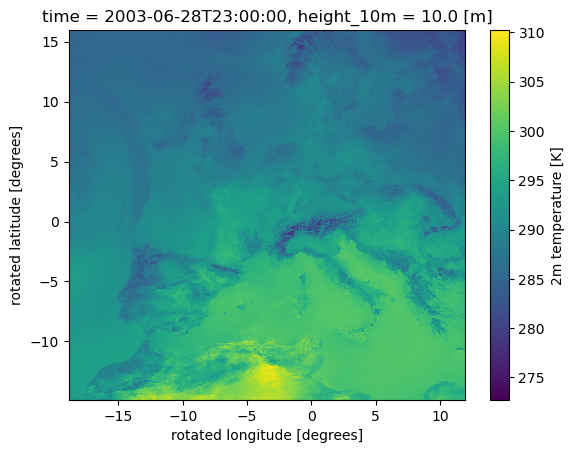

In [4]:
week_2km.T_2M.isel(time=-1).plot()

## Bilinear interpolation

In [1]:
lat_bnd = [-7, 5]
lon_bnd = [-15, -5]
lin_downs = xr.open_dataset("bilin_2km.nc")

NameError: name 'xr' is not defined

In [26]:
lin_downs

<xarray.Dataset>
Dimensions:     (time: 24, rlat: 1542, rlon: 1542)
Coordinates:
    height_2m   float32 ...
    height_10m  float32 ...
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-22T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
Data variables:
    T_2M        (time, rlat, rlon) float32 ...
    RELHUM_2M   (time, rlat, rlon) float32 ...
    TOT_PR      (time, rlat, rlon) float32 ...
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

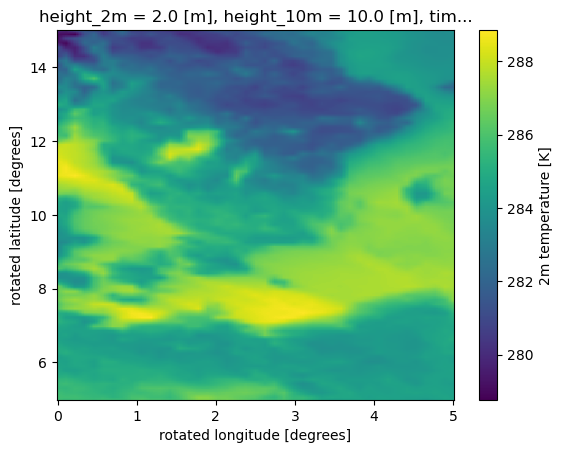

In [27]:
LIN_T = lin_downs.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time=0)
LIN_T.plot()

In [28]:
cubic_downs = xr.open_dataset("bicubic_week.nc")
cubic_downs

<xarray.Dataset>
Dimensions:     (time: 168, rlat: 1542, rlon: 1542)
Coordinates:
    height_2m   float32 ...
    height_10m  float32 ...
  * time        (time) datetime64[ns] 2003-06-22 ... 2003-06-28T23:00:00
  * rlon        (rlon) float32 -18.86 -18.84 -18.82 -18.8 ... 11.92 11.94 11.96
  * rlat        (rlat) float32 -14.86 -14.84 -14.82 -14.8 ... 15.92 15.94 15.96
Data variables:
    T_2M        (time, rlat, rlon) float32 ...
    RELHUM_2M   (time, rlat, rlon) float32 ...
    TOT_PR      (time, rlat, rlon) float32 ...
Attributes:
    standard_name:  air_temperature
    long_name:      2m temperature
    units:          K
    grid_mapping:   rotated_pole

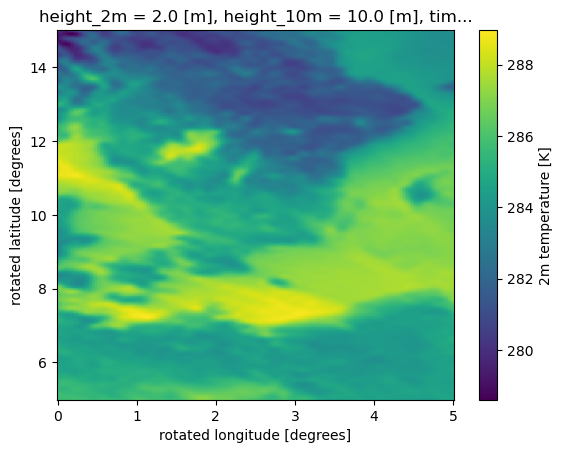

In [29]:
CUB_T = cubic_downs.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).T_2M.isel(time=0)
CUB_T.plot()

## Plot
in order to get the rlat/rlon, we need to find the relation between those two coordinates in the 3km res and apply it to the 12km

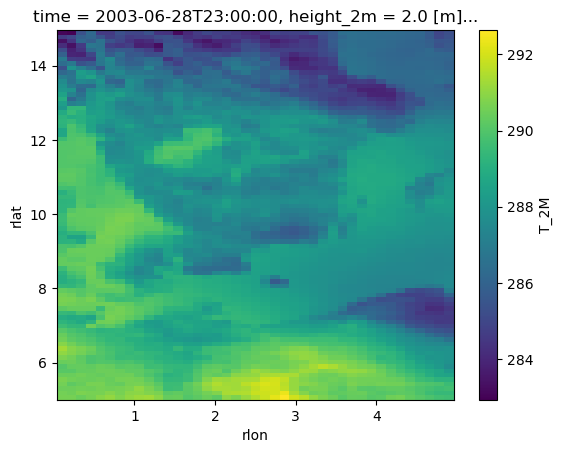

In [30]:
HR_T = week_2km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time=-1)
LR_T = week_12km.T_2M.sel(rlon=slice(*lon_bnd), rlat=slice(*lat_bnd)).isel(time=-1)
T = [HR_T,LR_T]
T[1].plot()

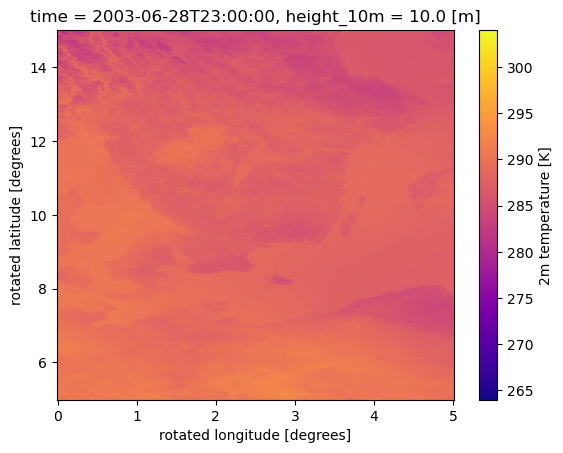

In [31]:
HR_T.plot(vmin = 264, vmax = 304, cmap='plasma')

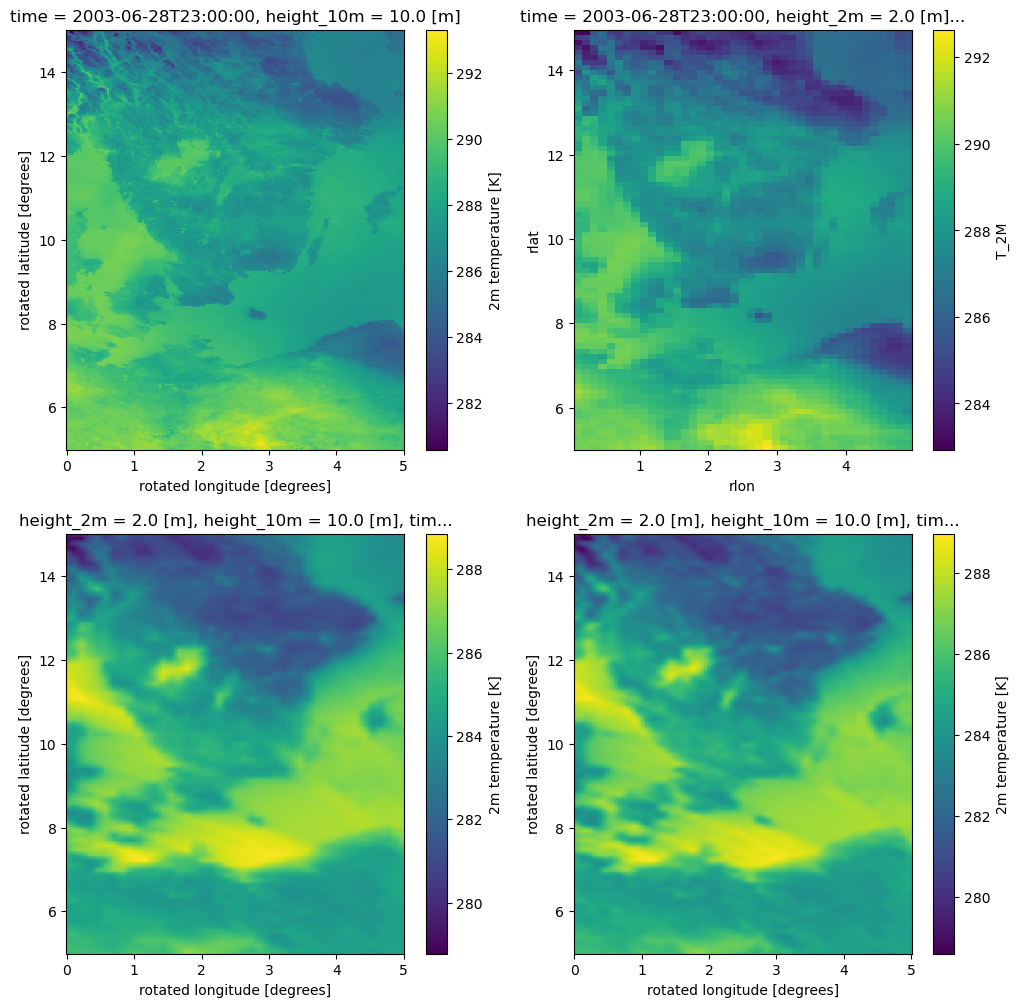

In [38]:
fig, axes = plt.subplots(ncols=2, nrows=2, squeeze=False, figsize =(12,12))
HR_T.plot(ax=axes[0, 0])
LR_T.plot(ax=axes[0, 1])
xplt.plot(LIN_T, ax=axes[1, 0])
xplt.plot(CUB_T, ax=axes[1, 1])
plt.draw()